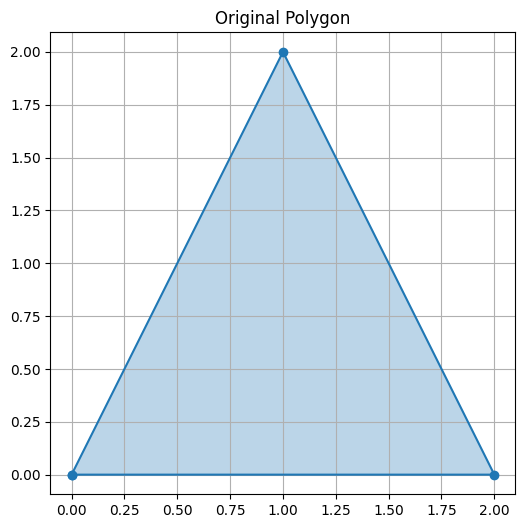

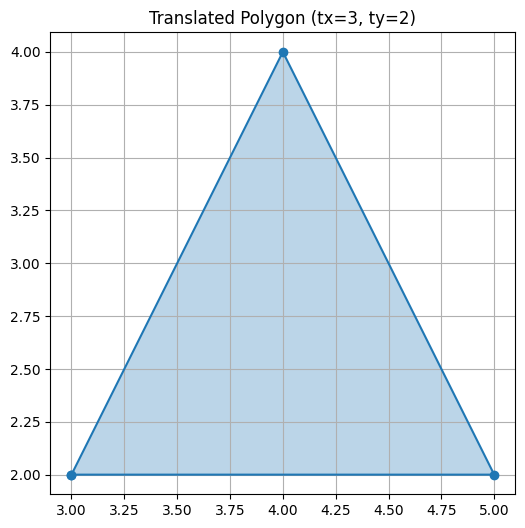

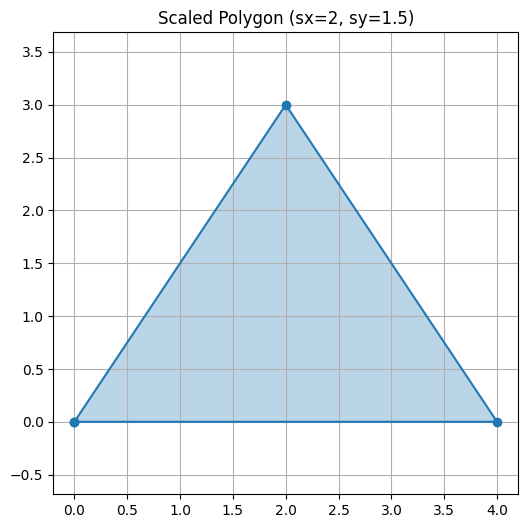

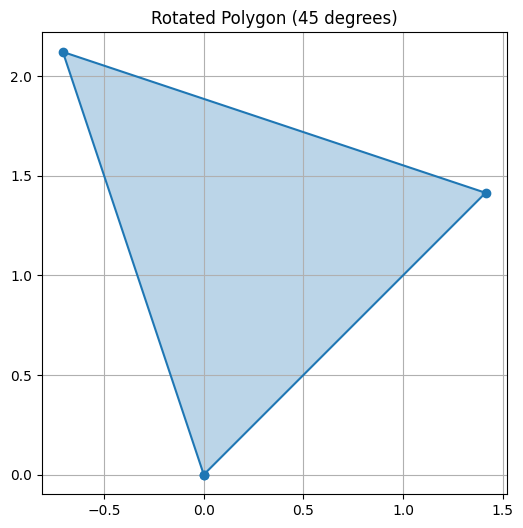

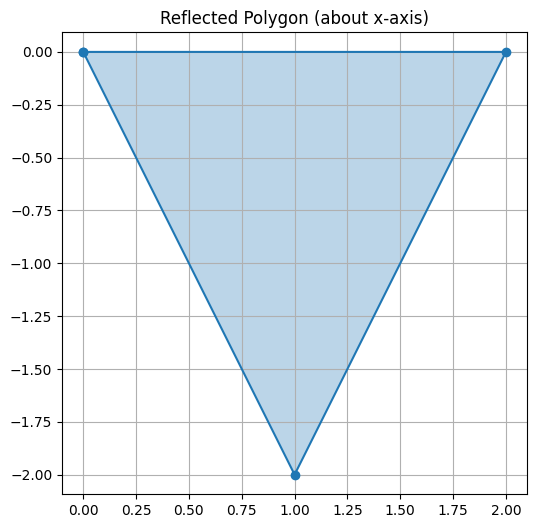

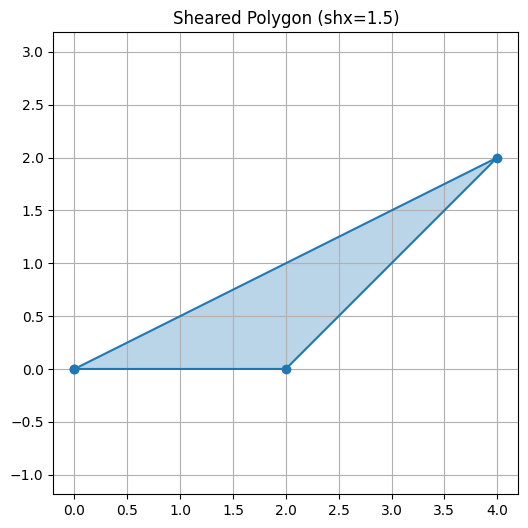

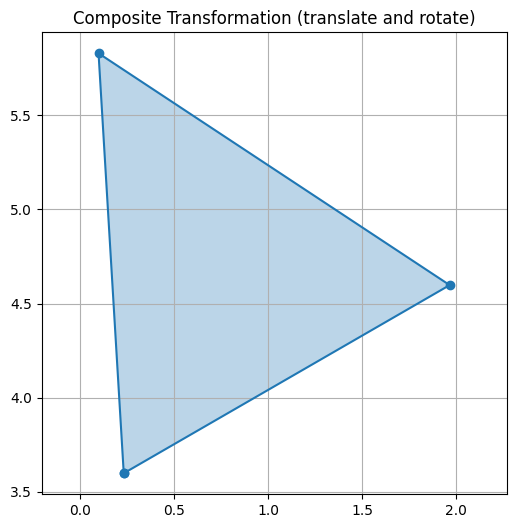

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the polygon
def plot_polygon(points, title):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], marker='o')
    plt.fill(points[:, 0], points[:, 1], alpha=0.3)
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Define 2D transformation functions
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    return np.dot(points, translation_matrix.T)

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    return np.dot(points, scaling_matrix.T)

def rotate(points, angle):
    radians = np.radians(angle)
    rotation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                [np.sin(radians), np.cos(radians), 0],
                                [0, 0, 1]])
    return np.dot(points, rotation_matrix.T)

def reflect(points, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    return np.dot(points, reflection_matrix.T)

def shear(points, shx=0, shy=0):
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    return np.dot(points, shearing_matrix.T)

# Composite transformation: translation followed by rotation
def composite_transformation(points, tx, ty, angle):
    points = translate(points, tx, ty)
    points = rotate(points, angle)
    return points

# Define a polygon (a triangle in this case)
polygon = np.array([[0, 0, 1], [2, 0, 1], [1, 2, 1], [0, 0, 1]])

# Plot original polygon
plot_polygon(polygon, 'Original Polygon')

# Apply and plot transformations
translated_polygon = translate(polygon, 3, 2)
plot_polygon(translated_polygon, 'Translated Polygon (tx=3, ty=2)')

scaled_polygon = scale(polygon, 2, 1.5)
plot_polygon(scaled_polygon, 'Scaled Polygon (sx=2, sy=1.5)')

rotated_polygon = rotate(polygon, 45)
plot_polygon(rotated_polygon, 'Rotated Polygon (45 degrees)')

reflected_polygon = reflect(polygon, axis='x')
plot_polygon(reflected_polygon, 'Reflected Polygon (about x-axis)')

sheared_polygon = shear(polygon, shx=1.5, shy=0)
plot_polygon(sheared_polygon, 'Sheared Polygon (shx=1.5)')

composite_polygon = composite_transformation(polygon, 2, 3, 30)
plot_polygon(composite_polygon, 'Composite Transformation (translate and rotate)')


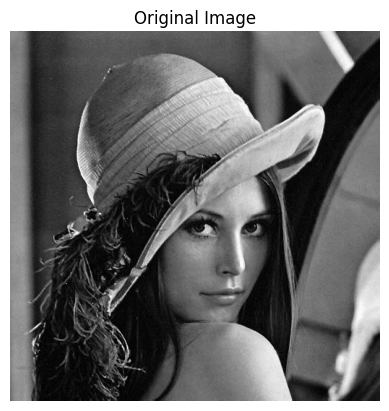

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image, ensuring correct path and extension
image = cv2.imread('/content/Picture1.jpg')  # or /content/your_image.jpg
display_image(image, 'Original Image')

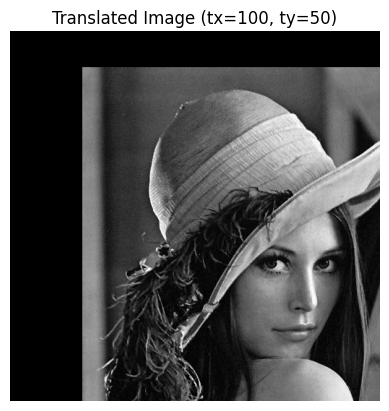

In [ ]:
# Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 100, 50)
display_image(translated_image, 'Translated Image (tx=100, ty=50)')

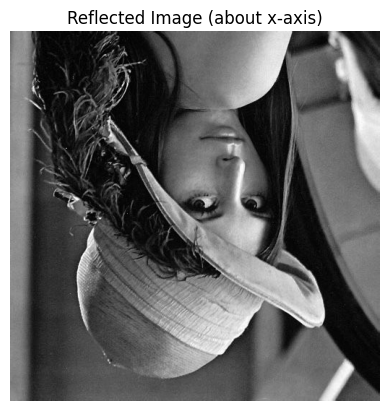

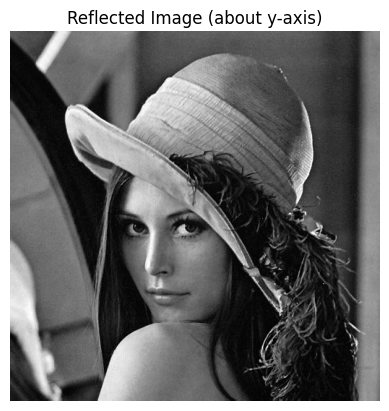

In [ ]:
# Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)
    return reflected_image

reflected_image_x = reflect_image(image, 'x')
display_image(reflected_image_x, 'Reflected Image (about x-axis)')

reflected_image_y = reflect_image(image, 'y')
display_image(reflected_image_y, 'Reflected Image (about y-axis)')

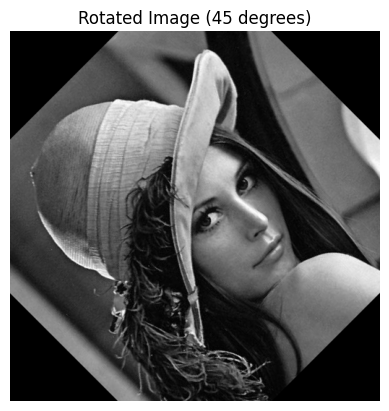

In [ ]:
# Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols / 2, rows / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image(rotated_image, 'Rotated Image (45 degrees)')

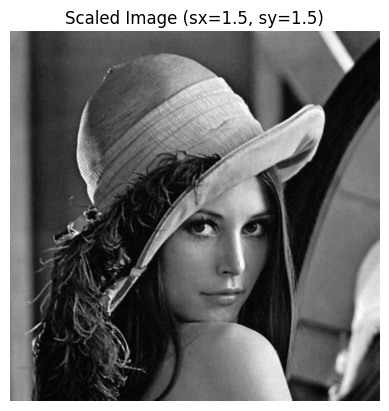

In [ ]:
def scale_image(image, sx, sy):
    scaled_image = cv2.resize(image, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 1.5, 1.5)
display_image(scaled_image, 'Scaled Image (sx=1.5, sy=1.5)')

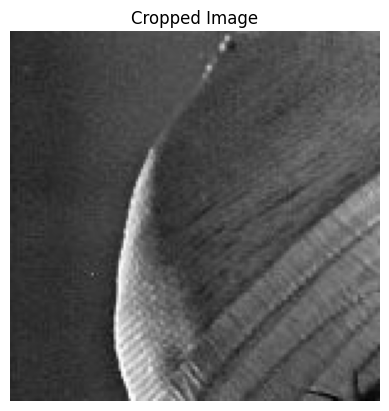

In [ ]:
def crop_image(image, start_row, start_col, end_row, end_col):
    cropped_image = image[start_row:end_row, start_col:end_col]
    return cropped_image

cropped_image = crop_image(image, 50, 50, 200, 200)
display_image(cropped_image, 'Cropped Image')

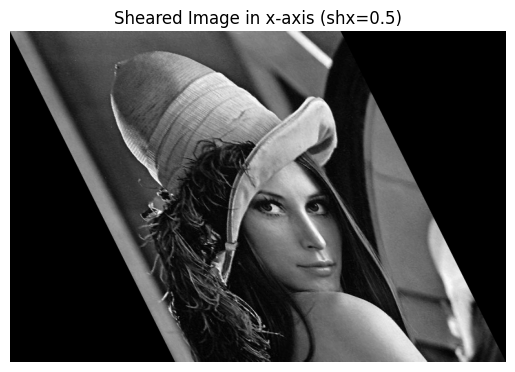

In [ ]:

# Shearing in x-axis
def shear_image_x(image, shx):
    rows, cols = image.shape[:2]
    shearing_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, shearing_matrix, (cols + int(rows * abs(shx)), rows))
    return sheared_image_x

sheared_image_x = shear_image_x(image, 0.5)
display_image(sheared_image_x, 'Sheared Image in x-axis (shx=0.5)')

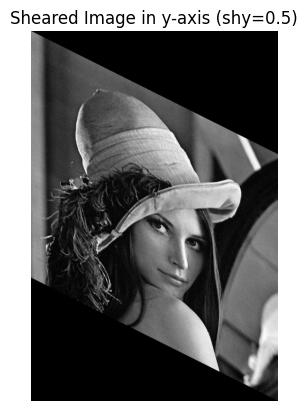

In [ ]:
# Shearing in y-axis
def shear_image_y(image, shy):
    rows, cols = image.shape[:2]
    shearing_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared_image_y = cv2.warpAffine(image, shearing_matrix, (cols, rows + int(cols * abs(shy))))
    return sheared_image_y

sheared_image_y = shear_image_y(image, 0.5)
display_image(sheared_image_y, 'Sheared Image in y-axis (shy=0.5)')